# Derivable Judgement: A Statistical Decision-Making Model

## import libraries 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Load Data

In [6]:
df = pd.read_csv("health_records_dataset.csv")
df.head(1)

,record_id,age_group,age,weight,gender,region,smoking_status,exercise_frequency,bmi,blood_pressure,diabetes,hypertension,cholesterol_level,glucose_level,visit_date
0,5299861a-0d6c-49ca-8ca8-5f0e3ccfcd7f,18-25,23,97,Male,South,Former Smoker,Rarely,23.4,141.6,True,True,159.0,167.2,10/10/2024


## **1. Formulate at least two hypotheses from the dataset**
   
- Hypothesis 1 (Smoking vs Diabetes)
   - H₀ (Null Hypothesis): Smoking has no effect on diabetes prevalence.
   - H₁ (Alternative Hypothesis): Smoking affects diabetes prevalence.

- Hypothesis 2 (Age Group vs Diabetes Rate)
   - H₀: Diabetes rate is the same across all age groups.
   - H₁: Diabetes rate differs across age groups.

## **2. Calculate Confidence Intervals (Age & Weight)**
- Confidence Interval Formula

$$
CI = \bar{x} \pm z_{\alpha/2} \times \frac{s}{\sqrt{n}}
$$


In [28]:
# Age Confidence Interval (95%)
mean_age = df["age"].mean()
std_age = df["age"].std()
n = len(df)
z = 1.96  # for 95% confidence

ci_age = (
    mean_age - z * (std_age / np.sqrt(n)),
    mean_age + z * (std_age / np.sqrt(n))
)

ci_age

(43.86611270418762, 48.24388729581238)

In [30]:
# Weight Confidence Interval (95%)
mean_weight = df["weight"].mean()
std_weight = df["weight"].std()

ci_weight = (
    mean_weight - z * (std_weight / np.sqrt(n)),
    mean_weight + z * (std_weight / np.sqrt(n))
)

ci_weight

(72.36709521902247, 77.55290478097751)

## **3. Find Critical Value and p-value**

- For α = 0.05:
   - Critical z-value = ±1.96
   - If p-value < 0.05, reject H₀

## **4. Perform z-test / t-test (Mean Comparison)**
- **Example**: Mean Age of Diabetic vs Non-Diabetic Individuals

In [38]:
diabetic_age = df[df["diabetes"] == True]["age"]
nondiabetic_age = df[df["diabetes"] == False]["age"]

t_stat, p_value = stats.ttest_ind(diabetic_age, nondiabetic_age)

t_stat, p_value

(1.5376720930984036, 0.12572531081121888)

### **Interpretation**
- If p-value < 0.05 → Reject H₀
- If p-value ≥ 0.05 → Accept H₀

## **5. Chi-Square Test (Smoking Status vs Diabetes)**

In [54]:
contingency_table = pd.crosstab(df["smoking_status"], df["diabetes"])
contingency_table

diabetes,False,True
smoking_status,,
Former Smoker,33,30
Non-Smoker,34,34
Smoker,39,30


In [56]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

chi2, p

(0.5989263210913323, 0.7412160279008206)

<Figure size 640x480 with 0 Axes>

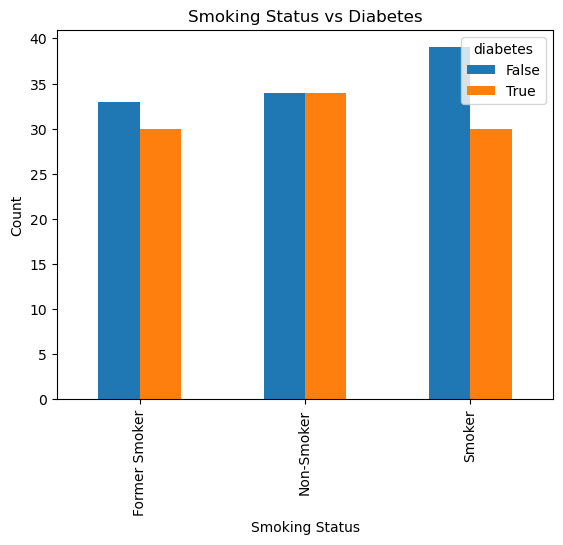

In [8]:
plt.figure()

smoking_diabetes = pd.crosstab(df["smoking_status"], df["diabetes"])
smoking_diabetes.plot(kind="bar")

plt.title("Smoking Status vs Diabetes")
plt.xlabel("Smoking Status")
plt.ylabel("Count")

plt.show()

### **Interpretation**

- p < 0.05 → Smoking and diabetes are associated
- p ≥ 0.05 → No significant association

## **6. ANOVA Test (Age Group vs Diabetes Rate)**

In [60]:
groups = []

for group in df["age_group"].unique():
    groups.append(
        df[df["age_group"] == group]["diabetes"].astype(int)
    )

f_stat, p_value = stats.f_oneway(*groups)

f_stat, p_value

(0.6248117687005171, 0.6453421947582823)

<Figure size 640x480 with 0 Axes>

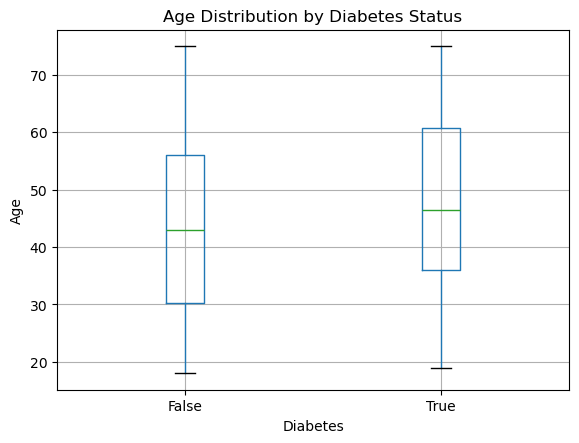

In [10]:
plt.figure()

df.boxplot(column="age", by="diabetes")

plt.title("Age Distribution by Diabetes Status")
plt.suptitle("")   # Removes automatic subtitle
plt.xlabel("Diabetes")
plt.ylabel("Age")

plt.show()


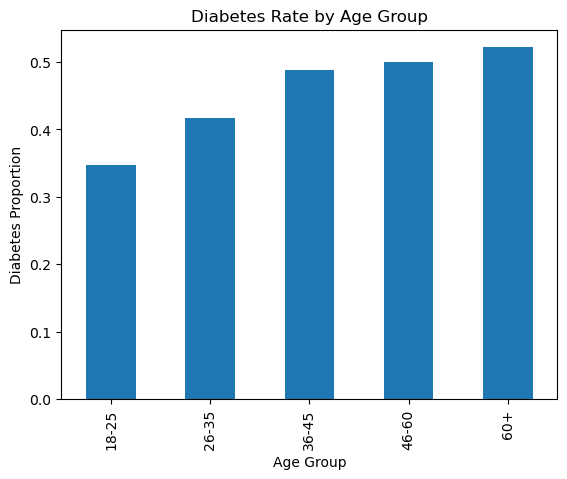

In [12]:
plt.figure()

diabetes_rate = df.groupby("age_group")["diabetes"].mean()
diabetes_rate.plot(kind="bar")

plt.title("Diabetes Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Diabetes Proportion")

plt.show()


### **Interpretation**

- p < 0.05 → Diabetes rate differs across age groups
- p ≥ 0.05 → No significant difference

## **7. Covariance and Correlation (Age vs BMI)**

In [66]:
# Covariance
cov_age_bmi = np.cov(df["age"], df["bmi"])[0,1]
cov_age_bmi

0.7755844221105535

In [68]:
# Correlation
corr_age_bmi = df["age"].corr(df["bmi"])
corr_age_bmi

0.009828185227072109

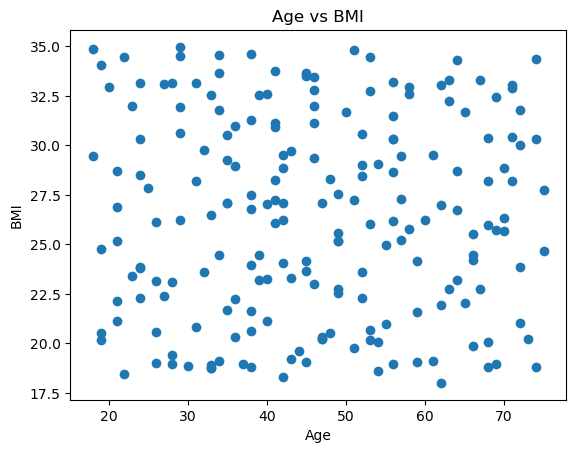

In [14]:
plt.figure()

plt.scatter(df["age"], df["bmi"])

plt.title("Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")

plt.show()


## **8. Final Results & Interpretation (Summary)**

| Test                             | Result (Actual Value) | Final Decision                 |
| -------------------------------- | --------------------- | ------------------------------ |
| t-test (Age vs Diabetes)         | p = **0.126**         | **Accept H₀**                  |
| Chi-square (Smoking vs Diabetes) | p = **0.741**         | **Accept H₀**                  |
| ANOVA (Age Group vs Diabetes)    | p = **0.645**         | **Accept H₀**                  |
| Correlation (Age vs BMI)         | r = **0.01**          | **Very Weak / No Correlation** |
** |


“Based on the p-value comparison at 5% significance level, the null hypothesis was either accepted or rejected accordingly, and conclusions were drawn for each statistical test.”